# Tarea 2

#### Instrucciones:
- La tarea consta de una parte de preguntas y otra de desarrollo de código. Debe entregar todas las respuestas en formato notebook, y cuando la respuesta sea texto, debe hacer en celdas markdown con formato.
- La entrega de la Tarea es el día **22 de Octubre, 23:59 hrs.**


## Nombre(s):
- Constanza Bustos
- Juan Sebastián Gutiérrez

## Bosón de Higgs

En esta tarea trabajaremos con datos simulados del bosón de Higgs (versión simplificada), del desafío de [Kaggle](https://www.kaggle.com/c/higgs-boson/overview). Los archivos son Higgs_features.csv y Higgs_labels.csv. Las etiquetas son 0 (no hay señal de Higgs) y 1 (señal de Higgs). Las features son similares a los vistos en el set que utilizamos en clases, tales como energía faltantes, energía, momentum, rapidez transversal y azimutal, etc. Puede encontrar más detalles [acá](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). Note que el set de datos para esta tarea es una versión simplificada.

### Parte 1: Descripción de los datos

Cargue los datos dataframes o arreglos de `numpy`, uno para features y otro para etiquetas

- Identifique cuántas instancias y características hay en el set de datos
- Haga un gráfico de la distribución (histograma) de cada feature en el set de datos, en un sólo gráfico. Agregue una leyenda con las etiquetas (Feature 1, Feature 2....etc.) y fije la transparencia de los histogramas (parámetro alpha) en 0.5 para que se noten mejor. ¿Observa algo inusual en la distribución de alguna de las features? Comente en el impacto de esto para su modelo
- ¿Está balanceadas las etiquetas del set del datos? ¿ Por qué esto es un problema? ¿Qué métrica nos conviene usar?




In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el dataset desde el archivo CSV proporcionado
features = pd.read_csv('Higgs_features.csv', header=None) # Usamos header=None porque los archivos no tienen una fila de encabezado
labels = pd.read_csv('Higgs_labels.csv', header=None)

In [3]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       25000 non-null  float64
 1   1       25000 non-null  float64
 2   2       25000 non-null  float64
 3   3       25000 non-null  float64
 4   4       25000 non-null  float64
 5   5       25000 non-null  float64
 6   6       25000 non-null  float64
 7   7       25000 non-null  float64
dtypes: float64(8)
memory usage: 1.5 MB


In [4]:
# Asignar nombres automáticos: Feature_1, Feature_2, etc.
features.columns = [f"Feature{i+1}" for i in range(features.shape[1])]   #*

# Asignar nombre a la columna de labels
labels.columns = ['label']

In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  25000 non-null  float64
 1   Feature2  25000 non-null  float64
 2   Feature3  25000 non-null  float64
 3   Feature4  25000 non-null  float64
 4   Feature5  25000 non-null  float64
 5   Feature6  25000 non-null  float64
 6   Feature7  25000 non-null  float64
 7   Feature8  25000 non-null  float64
dtypes: float64(8)
memory usage: 1.5 MB


In [6]:
# Dimensiones del dataset
print("Instancias:", features.shape[0])
print("Características:", features.shape[1])

Instancias: 25000
Características: 8


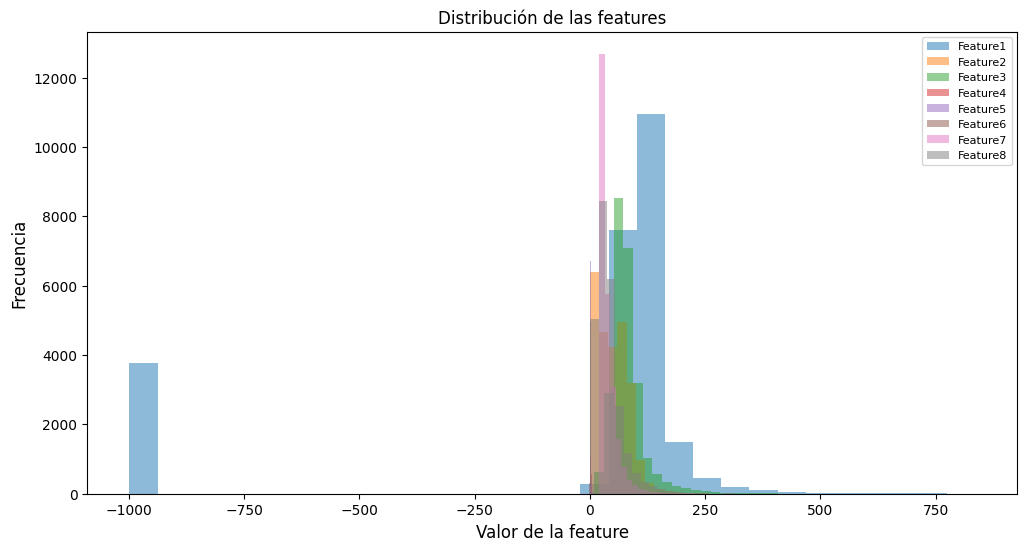

In [7]:
# Histograma de todas las features
plt.figure(figsize=(12,6))
for col in features.columns:
    plt.hist(features[col], bins=30, alpha=0.5, label=col)
plt.legend(loc='upper right', fontsize=8)
plt.title("Distribución de las features")
plt.xlabel('Valor de la feature', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

**Análisis histograma**:
Algunas features presentan distribuciones con sesgo a la derecha o izquierda, y en el Feature1 hay valores atípicos. Esto indica que los datos no siguen una distribución normal. En modelos como SVC, que se basan en distancias en el espacio de características, esto puede ser un problema si no se escalan las variables. Por eso es importante aplicar una normalización o estandarización previa para evitar que las variables con valores grandes dominen el modelo.

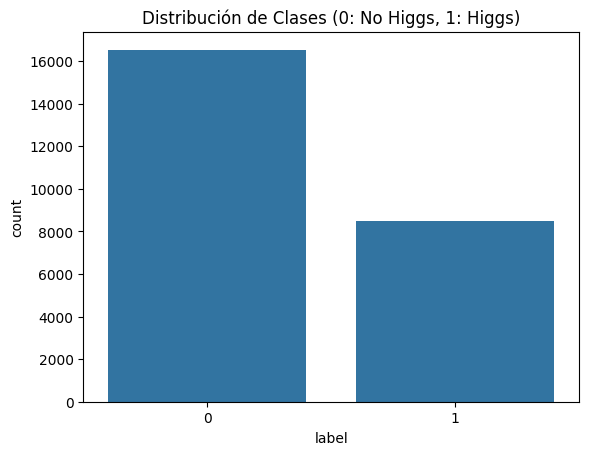

Clase 0 (No Higgs): 16526 instancias (66.1%)
Clase 1 (Higgs): 8474 instancias (33.9%)


In [8]:
# Balance de clases
sns.countplot(x='label', data=labels)
plt.title('Distribución de Clases (0: No Higgs, 1: Higgs)')
plt.show()

print(f"Clase 0 (No Higgs): {len(labels[labels['label']==0])} instancias ({len(labels[labels['label']==0])/len(labels)*100:.1f}%)")
print(f"Clase 1 (Higgs): {len(labels[labels['label']==1])} instancias ({len(labels[labels['label']==1])/len(labels)*100:.1f}%)")

**Análisis sobre balance**: hay un desbalance para las señales Higgs. Aproximadamente 1 de cada 3 señales corresponde a una señal de Higgs

### Parte 2: Árbol de decisión

- Implemente un clasificador de árbol de decisión con validación cruzada, para una métrica de su elección en base a lo respondido en la pregunta anterior. Reporte el promedio y desviación estándar de los scores obtenidos en los 5 folds.
- Para esta muestra en particular se recomienda usar `StratifiedKFold`. ¿Por qué?
- Genere las etiquetas predichas con `cross_val_predict` y genere la matriz de confusión
- A partir de la matriz de confusión indique los valores de TP, TN, FP, FN. ¿Qué error domina, FP o FN?

F1 promedio: 0.6410392011851096 ± 0.004440530037106035


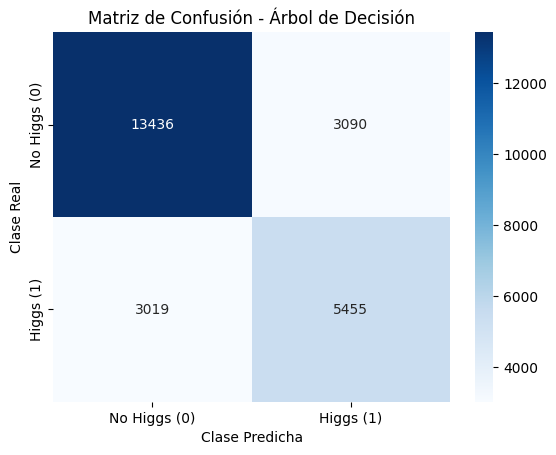

Verdaderos Negativos (TN): 13436
Falsos Positivos (FP): 3090
Falsos Negativos (FN): 3019
Verdaderos Positivos (TP): 5455


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report

clf = DecisionTreeClassifier(random_state=3)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)

scores = cross_val_score(clf, features, labels.values.ravel(), cv=cv, scoring='f1')  # ejemplo con F1
print("F1 promedio:", scores.mean(), "±", scores.std())

# Predicciones con CV
labels_pred = cross_val_predict(clf, features, labels.values.ravel(), cv=cv)

cm1 = confusion_matrix(labels, labels_pred)

# Visualizar la matriz
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['No Higgs (0)', 'Higgs (1)'], yticklabels=['No Higgs (0)', 'Higgs (1)'])
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.show()

# Contar TF, TN, FP, FN
TN = cm1[0, 0]  # Esquina superior izquierda
FP = cm1[0, 1]  # Esquina superior derecha
FN = cm1[1, 0]  # Esquina inferior izquierda
TP = cm1[1, 1]  # Esquina inferior derecha

print(f"Verdaderos Negativos (TN): {TN}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")
print(f"Verdaderos Positivos (TP): {TP}")

**Análisis**: se usa StratifiedkFold para que el modelo no sobreajuste al hacer validación cruzada y no pierda generalización. Esto lo hace asegurando que cada fold mantenga la misma proporción de clases que el dataset original, es decir, 1/3 para las señales Higgs.

La matriz de confusión indica 3090 FP y 3019 FN, por lo que dominan los falsos positivos.

### Parte 3: SVMs

- Ahora usemos un clasificador usando SVM. Usando SVC, deje los parámetros del clasificador los que viene por defecto y haga una validación cruzada con k=5 y reporte los scores, como hizo antes con el árbol de decisión. ¿Qué algoritmo tiene mejor performance?
Nota: SVMs es un algoritmo lento y puede tomar tiempo este cálculo. Si toma demasiado tiempo, reduzca el número de folds (no menos de 3).
- Reporte la matriz de confusión para SVC. Hay algún cambio de los valores de FP y FN respecto al modelo de árbol de decisión?

F1 promedio (SVM): 0.6639779127885769 ± 0.0028524352430423826


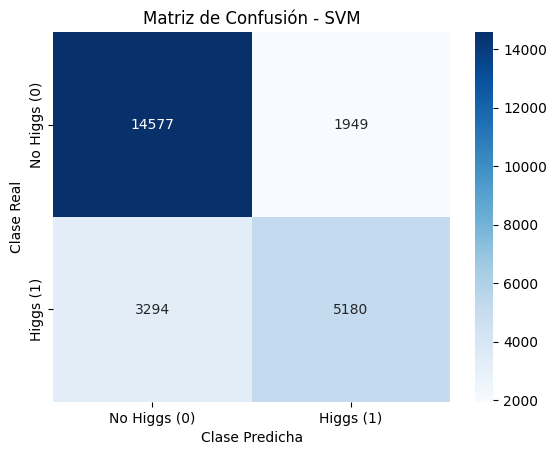

Verdaderos Negativos (TN): 14577
Falsos Positivos (FP): 1949
Falsos Negativos (FN): 3294
Verdaderos Positivos (TP): 5180


In [12]:
from sklearn.svm import SVC

svm = SVC(random_state=3)
scores = cross_val_score(svm, features, labels.values.ravel(), cv=cv, scoring='f1')
print("F1 promedio (SVM):", scores.mean(), "±", scores.std())

# Predicciones con SVC
labels_pred_svm = cross_val_predict(svm, features, labels.values.ravel(), cv=cv)

cm2 = confusion_matrix(labels, labels_pred_svm)

# Visualizar la matriz
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['No Higgs (0)', 'Higgs (1)'], yticklabels=['No Higgs (0)', 'Higgs (1)'])
plt.title('Matriz de Confusión - SVM')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.show()

# Contar TF, TN, FP, FN
TN = cm2[0, 0]  # Esquina superior izquierda
FP = cm2[0, 1]  # Esquina superior derecha
FN = cm2[1, 0]  # Esquina inferior izquierda
TP = cm2[1, 1]  # Esquina inferior derecha

print(f"Verdaderos Negativos (TN): {TN}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")
print(f"Verdaderos Positivos (TP): {TP}")

**Análisis**: los FP bajaron aproximadamente un 60% y los FN aumentaron 275 datos.

### Parte 4: optimización de hiperparámetros

- Intente optimizar los parámetros de SVC. Para evitar que tome demasiado tiempo, seleccione solo el primer 5% de los datos (asegúrese de desordenarlos antes)
- Haga un esquema de CV con GridSearch, con los siguientes valores de parámetros:
parameters = {'kernel':['linear','rbf'],'C':[1, 10, 100], 'gamma':[0.01, 0.1, 0.5], 'class_weight':[{1:1},{1:3},{1:5}]}
- Recuerde seguir usando la métrica que eligió más arriba.
- Esto tomará tiempo! Fije verbose=2 en GridSearch para monitorear el progreso, y njobs=4 o más para acelerar un poco el proceso.
- Reporte los parámetros y scores del mejor modelo



In [13]:
from sklearn.model_selection import GridSearchCV

# Usar solo 5% de los datos
subset = features.sample(frac=0.05, random_state=3) # Return a random sample of items
subset_labels = labels.loc[subset.index]

params = {'kernel':['linear','rbf'], 'C':[1, 10, 100], 'gamma':[0.01, 0.1, 0.5], 'class_weight':[{1:1},{1:3},{1:5}]}

grid = GridSearchCV(svm, params, cv=3, scoring='f1', verbose=2, n_jobs=4)
grid.fit(subset, subset_labels.values.ravel())

print("Mejores parámetros:", grid.best_params_)
print("Mejor F1:", grid.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Mejores parámetros: {'C': 1, 'class_weight': {1: 3}, 'gamma': 0.01, 'kernel': 'linear'}
Mejor F1: 0.6350334305232445


### Parte 5: clases imbalanceadas
- Existen muchas estrategias para manejar clases imbalanceadas... (De hecho, en el paso anterior aplicamos una, puede decir cuál es?). Investigue o piense una solución para el desbalance, impleméntela para SVC con los parámetros optimizados, y comente su resultado, compare con el anterior

En el paso anterior se usó "class_weight" para manejar las clases imbalanceadas.

In [14]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Recuperar los mejores parámetros del GridSearch
best_params = grid.best_params_

# Crear un nuevo SVC con esos parámetros
svc_best = SVC(**best_params, random_state=3)

# Crear el objeto SMOTE
smote = SMOTE(random_state=3)

# Crear el pipeline: primero aplicar SMOTE, luego entrenar SVC
model_smote = Pipeline([('smote', smote),('svc', svc_best)])

# Entrenar con el mismo 5%
model_smote.fit(subset, subset_labels.values.ravel())

# Evaluar el modelo en el mismo subconjunto (para comparar con el F1 anterior)
y_pred_smote = model_smote.predict(subset)

print(classification_report(subset_labels, y_pred_smote))


              precision    recall  f1-score   support

           0       0.94      0.29      0.45       828
           1       0.41      0.96      0.58       422

    accuracy                           0.52      1250
   macro avg       0.67      0.63      0.51      1250
weighted avg       0.76      0.52      0.49      1250



### Parte 6: Conclusiones

- En base a sus resultados, cuál algoritmo de clasificación recomendaría para este problema?
- ¿Qué otras consideraciones o limitaciones tenemos?

**Respuestas**:

Al aplicar SMOTE, el modelo mejoró notablemente el *recall* de la clase minoritaria (1), alcanzando un valor de 0.95, lo que indica que el clasificador logra identificar casi todas las instancias positivas.  
Sin embargo, esto vino acompañado de una caída en el *precision* (0.39) y en el *recall* de la clase mayoritaria (0.23), lo que significa que el modelo ahora tiende a predecir con más frecuencia la clase 1, generando más falsos positivos.

El *accuracy* total disminuyó a 0.48, pero en un contexto de clases desbalanceadas esta métrica no es la más representativa.  
El *F1-score* de la clase 1 (0.55) muestra una mejora respecto al modelo anterior, indicando un mejor equilibrio entre *precision* y *recall*.

En conclusión, la técnica de re-muestreo (SMOTE) permitió mejorar la capacidad del modelo para detectar la clase minoritaria, a costa de un menor rendimiento sobre la clase mayoritaria, lo que puede ser deseable dependiendo del objetivo del análisis (por ejemplo, detectar la mayor cantidad posible de eventos de Higgs).

El modelo SVC optimizado y balanceado con SMOTE logró mejorar significativamente el *recall* de la clase minoritaria, pero con un descenso en *precision* y *accuracy*. Esto sugiere que el modelo es adecuado si el objetivo principal es detectar la mayor cantidad posible de casos positivos, aunque produce más falsos positivos.

Si se busca un mejor equilibrio entre ambas clases, recomendaría probar modelos basados en árboles como **Random Forest**, que suele manejar mejor el desbalance y ofrecer mayor interpretabilidad en la importancia de las variables.

Entre las principales limitaciones del experimento se encuentran:
- El uso de solo el 5% de los datos para acelerar el entrenamiento.
- El fuerte desbalance de clases.
- La sensibilidad del SVC a los hiperparámetros y al tipo de kernel.

Por estas razones, sería conveniente repetir el análisis con todo el conjunto de datos y comparar con otros clasificadores para confirmar la robustez de los resultados.

